In [ ]:
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
import time 
import re
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np

In [ ]:
!pip install arabic_reshaper
!pip install python-bidi
!pip install mplcursors
from bidi.algorithm import get_display
import arabic_reshaper
import mplcursors

     |████████████████████████████████| 86 kB 2.9 MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.4-py3-none-any.whl size=19983 sha256=146781a176c0d65f555883db9488176c938a2ff2cf4effc56a8772f8ae98011e
  Stored in directory: /root/.cache/pip/wheels/09/8a/90/32b30a664f7c3c4b0062f2cc5593696d1d82e758dc54d5cc1f
Successfully built mplcursors


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unrar x "/content/drive/MyDrive/ferdowsi-data.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/ferdowsi-data.rar

Creating    Spad                                                      OK
Extracting  Spad/ferdowsi-data.txt                                         0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90

In [ ]:
file = open('/content/Spad/ferdowsi-data.txt', 'r')
df = pd.DataFrame()


NUM_ENTRIES = 10000 #number of entries to fetch 


In [ ]:
cnt = 0
cur_entry = ''

for _ in range(NUM_ENTRIES*16):
    cnt += 1
    line = file.readline()
    cur_entry += line
    try:
        if cnt % 16 == 0:
            row = json.loads(cur_entry)
            row = row['_source']
           #print(row)
            df = df.append(row, ignore_index=True)
            cur_entry = ''
    except:
        pass

file.close()


In [ ]:
#dt_created_bckp = df['date_created']	

df

,agency,category,content,date_created,image,lead,title,url
0,13,15,فهیمه حسن‌میری: اگرچه در هیاهوی انتخابات ریاس...,1.494518e+09,uploads/2017/05/11/1589793661.jpg,جامعه&nbsp;&gt;&nbsp;شهری - میزگردی درباره عمل...,کارهای قالیباف در تهران نمایشی بود- شورای‌شهر ...,http://www.khabaronline.ir/(X(1)S(bud4wg3ebzbx...
1,1,20,به گزارش خبرگزاری فارس از قم، محمدعلی برزنونی ...,1.494522e+09,uploads/2017/05/11/1713799235.jpg,مدیر مؤسسه علمی و پژوهشی ابن‌سینا در بوسنی گفت...,معنویت در عصر آخرالزمان احیا می‌شود,http://www.farsnews.com/13960221001386
2,36,5,به گزارش ایرنا، تیم های تراکتورسازی تبریز و...,1.494522e+09,uploads/2017/05/11/2561366787.jpg,تهران - ایرنا - دیدار پایانی جام حذفی باشگاه ه...,فینال جام حذفی؛ وداع البرز حاجی پور از داوری-3...,http://www.irna.ir/fa/News/82525960/
3,13,8,به گزارش خبرگزاری خبرآنلاین، جمشید مشایخی، هن...,1.494522e+09,uploads/2017/05/11/109987278.jpg,فرهنگ&nbsp;&gt;&nbsp;سینما - جمشید مشایخی، امر...,موضع انتخاباتی جمشید مشایخی روی تخت بیمارستان-...,http://www.khabaronline.ir/(X(1)S(nducmtisxqhw...
4,13,7,به گزارش خبرآنلاین، پیش‌تر گفته شد سامسونگ و ...,1.494522e+09,uploads/2017/05/11/3295317773.jpg,فناوری اطلاعات&nbsp;&gt;&nbsp;سخت افزار - اسنپ...,مشخصات فنی پردازنده اسنپ دراگون ۸۴۵- رونمایی ا...,http://www.khabaronline.ir/(X(1)S(uupfbn0kvlth...
...,...,...,...,...,...,...,...,...
9995,21,78,به گزارش خبرنگار گروه استان های باشگاه خبرن...,1.495290e+09,uploads/2017/05/20/2665703450.jpg,فریدون همتی استاندار قزوین با صدور پیامی خلق ح...,پیام تبریک استاندار برای خلق حماسه سیاسی,http://www.yjc.ir/fa/news/6095495/%D9%BE%DB%8C...
9996,21,64,به گزارش گروه استان های باشگاه خبرنگاران جوا...,1.495290e+09,uploads/2017/05/20/264666546.jpg,استاندار اصفهان با صدور پیامی با تقدیر از هموط...,تقدیر استاندار اصفهان از حضور پرشور مردم اصفها...,http://www.yjc.ir/fa/news/6095498/%D8%AA%D9%82...
9997,2,15,سرهنگ کشواد بهروزی زاده در گفت و گو با خبرنگا...,1.495290e+09,uploads/2017/05/20/1678039667.jpg,زاهدان - ایرنا - فرمانده پلیس راه شمال سیستان ...,بروز 2 فقره تصادف در سیستان و بلوچستان 4 کشته ...,http://www.irna.ir/fa/News/82538677/
9998,256,101,به گزارش خبرگزاری اهل‌بیت(ع) ـ ابنا ـ امیر کوی...,1.495290e+09,False,,پیام تبریک امیر کویت و رؤسای جمهوری سوریه و رو...,http://fa.abna24.com/news/%d8%a7%d8%ae%d8%a8%d...


In [ ]:
def epoch_to_date(epoch_seconds):
  #return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epoch_seconds)) to have the exact time 
  return time.strftime('%Y-%m-%d', time.localtime(epoch_seconds))

In [ ]:
df['date_created'] = df['date_created'].apply(lambda x: epoch_to_date(x))

In [ ]:
df

,agency,category,content,date_created,image,lead,title,url,agency_name
0,13,اجتماعی,فهیمه حسن‌میری: اگرچه در هیاهوی انتخابات ریاس...,2017-05-11,uploads/2017/05/11/1589793661.jpg,جامعه&nbsp;&gt;&nbsp;شهری - میزگردی درباره عمل...,کارهای قالیباف در تهران نمایشی بود- شورای‌شهر ...,http://www.khabaronline.ir/(X(1)S(bud4wg3ebzbx...,khabaronline
1,1,استانها,به گزارش خبرگزاری فارس از قم، محمدعلی برزنونی ...,2017-05-11,uploads/2017/05/11/1713799235.jpg,مدیر مؤسسه علمی و پژوهشی ابن‌سینا در بوسنی گفت...,معنویت در عصر آخرالزمان احیا می‌شود,http://www.farsnews.com/13960221001386,farsnews
2,36,ورزشی,به گزارش ایرنا، تیم های تراکتورسازی تبریز و...,2017-05-11,uploads/2017/05/11/2561366787.jpg,تهران - ایرنا - دیدار پایانی جام حذفی باشگاه ه...,فینال جام حذفی؛ وداع البرز حاجی پور از داوری-3...,http://www.irna.ir/fa/News/82525960/,irna
3,13,فرهنگی,به گزارش خبرگزاری خبرآنلاین، جمشید مشایخی، هن...,2017-05-11,uploads/2017/05/11/109987278.jpg,فرهنگ&nbsp;&gt;&nbsp;سینما - جمشید مشایخی، امر...,موضع انتخاباتی جمشید مشایخی روی تخت بیمارستان-...,http://www.khabaronline.ir/(X(1)S(nducmtisxqhw...,khabaronline
4,13,فناوری اطلاعات,به گزارش خبرآنلاین، پیش‌تر گفته شد سامسونگ و ...,2017-05-11,uploads/2017/05/11/3295317773.jpg,فناوری اطلاعات&nbsp;&gt;&nbsp;سخت افزار - اسنپ...,مشخصات فنی پردازنده اسنپ دراگون ۸۴۵- رونمایی ا...,http://www.khabaronline.ir/(X(1)S(uupfbn0kvlth...,khabaronline
...,...,...,...,...,...,...,...,...,...
9995,21,قزوین,به گزارش خبرنگار گروه استان های باشگاه خبرن...,2017-05-20,uploads/2017/05/20/2665703450.jpg,فریدون همتی استاندار قزوین با صدور پیامی خلق ح...,پیام تبریک استاندار برای خلق حماسه سیاسی,http://www.yjc.ir/fa/news/6095495/%D9%BE%DB%8C...,yjc
9996,21,اصفهان,به گزارش گروه استان های باشگاه خبرنگاران جوا...,2017-05-20,uploads/2017/05/20/264666546.jpg,استاندار اصفهان با صدور پیامی با تقدیر از هموط...,تقدیر استاندار اصفهان از حضور پرشور مردم اصفها...,http://www.yjc.ir/fa/news/6095498/%D8%AA%D9%82...,yjc
9997,2,اجتماعی,سرهنگ کشواد بهروزی زاده در گفت و گو با خبرنگا...,2017-05-20,uploads/2017/05/20/1678039667.jpg,زاهدان - ایرنا - فرمانده پلیس راه شمال سیستان ...,بروز 2 فقره تصادف در سیستان و بلوچستان 4 کشته ...,http://www.irna.ir/fa/News/82538677/,irna
9998,256,کل اخبار,به گزارش خبرگزاری اهل‌بیت(ع) ـ ابنا ـ امیر کوی...,2017-05-20,False,,پیام تبریک امیر کویت و رؤسای جمهوری سوریه و رو...,http://fa.abna24.com/news/%d8%a7%d8%ae%d8%a8%d...,fa


now, we're looking to map the values from categories from numbers to string (using the csv file at hand)

In [ ]:
reader = csv.reader(open('/content/drive/MyDrive/datasets/categories.csv', 'r'))
d = {}
for row in reader:
   pt1 = row[0].split(';')[0]
   pt2 = row[0].split(';')[1].replace('"',"")
   d[pt1] = pt2 

d

{'1': 'سیاسی',
 '10': 'بین الملل',
 '100': 'آستان قدس',
 '101': 'کل اخبار',
 '102': 'انتخابات',
 '103': 'ایثار و شهادت',
 '104': 'دولت',
 '105': 'صنعت',
 '106': 'شبکه های سیما',
 '107': 'روزنامه',
 '108': 'هیات های ورزشی',
 '109': 'اداره کل ورزش و جوانان',
 '11': 'جامعه',
 '110': 'ادارات شهرستانها',
 '111': 'اخبار اسلایدر',
 '112': 'دسته\u200cبندی نشده',
 '113': 'معاونت ورزش بانوان',
 '114': 'ورزش قهرمانی',
 '115': 'ورزش همگانی',
 '116': 'وزارت ورزش و جوانان',
 '117': 'کشتی باچوخه',
 '118': 'پیشکسوتان',
 '119': 'نشست های خبری',
 '12': 'حوزه و دانشگاه',
 '120': 'فرهنگی و امور جوانان',
 '121': 'باشگاه های ورزشی',
 '122': 'محیط زیست',
 '123': 'کشاورزی',
 '124': 'پتروشیمی',
 '125': 'توسعه فردی',
 '126': 'یادداشت',
 '127': 'مناطق',
 '128': 'اخبار کوتاه',
 '129': 'بازار',
 '13': 'سلامت',
 '130': 'مقاله',
 '131': 'مدیریت دولتی',
 '14': 'بیداری اسلامی',
 '15': 'اجتماعی',
 '16': 'رسانه ها',
 '20': 'استانها',
 '21': 'تاریخ',
 '22': 'دانستنی ها',
 '23': 'اخبار ویژه',
 '24': 'فضای مجازی',
 '25': '

In [ ]:
df['category'] = df['category'].map(d) 

In [ ]:
df

,agency,category,content,date_created,image,lead,title,url
0,13,اجتماعی,فهیمه حسن‌میری: اگرچه در هیاهوی انتخابات ریاس...,2017-05-11,uploads/2017/05/11/1589793661.jpg,جامعه&nbsp;&gt;&nbsp;شهری - میزگردی درباره عمل...,کارهای قالیباف در تهران نمایشی بود- شورای‌شهر ...,http://www.khabaronline.ir/(X(1)S(bud4wg3ebzbx...
1,1,استانها,به گزارش خبرگزاری فارس از قم، محمدعلی برزنونی ...,2017-05-11,uploads/2017/05/11/1713799235.jpg,مدیر مؤسسه علمی و پژوهشی ابن‌سینا در بوسنی گفت...,معنویت در عصر آخرالزمان احیا می‌شود,http://www.farsnews.com/13960221001386
2,36,ورزشی,به گزارش ایرنا، تیم های تراکتورسازی تبریز و...,2017-05-11,uploads/2017/05/11/2561366787.jpg,تهران - ایرنا - دیدار پایانی جام حذفی باشگاه ه...,فینال جام حذفی؛ وداع البرز حاجی پور از داوری-3...,http://www.irna.ir/fa/News/82525960/
3,13,فرهنگی,به گزارش خبرگزاری خبرآنلاین، جمشید مشایخی، هن...,2017-05-11,uploads/2017/05/11/109987278.jpg,فرهنگ&nbsp;&gt;&nbsp;سینما - جمشید مشایخی، امر...,موضع انتخاباتی جمشید مشایخی روی تخت بیمارستان-...,http://www.khabaronline.ir/(X(1)S(nducmtisxqhw...
4,13,فناوری اطلاعات,به گزارش خبرآنلاین، پیش‌تر گفته شد سامسونگ و ...,2017-05-11,uploads/2017/05/11/3295317773.jpg,فناوری اطلاعات&nbsp;&gt;&nbsp;سخت افزار - اسنپ...,مشخصات فنی پردازنده اسنپ دراگون ۸۴۵- رونمایی ا...,http://www.khabaronline.ir/(X(1)S(uupfbn0kvlth...
...,...,...,...,...,...,...,...,...
9995,21,قزوین,به گزارش خبرنگار گروه استان های باشگاه خبرن...,2017-05-20,uploads/2017/05/20/2665703450.jpg,فریدون همتی استاندار قزوین با صدور پیامی خلق ح...,پیام تبریک استاندار برای خلق حماسه سیاسی,http://www.yjc.ir/fa/news/6095495/%D9%BE%DB%8C...
9996,21,اصفهان,به گزارش گروه استان های باشگاه خبرنگاران جوا...,2017-05-20,uploads/2017/05/20/264666546.jpg,استاندار اصفهان با صدور پیامی با تقدیر از هموط...,تقدیر استاندار اصفهان از حضور پرشور مردم اصفها...,http://www.yjc.ir/fa/news/6095498/%D8%AA%D9%82...
9997,2,اجتماعی,سرهنگ کشواد بهروزی زاده در گفت و گو با خبرنگا...,2017-05-20,uploads/2017/05/20/1678039667.jpg,زاهدان - ایرنا - فرمانده پلیس راه شمال سیستان ...,بروز 2 فقره تصادف در سیستان و بلوچستان 4 کشته ...,http://www.irna.ir/fa/News/82538677/
9998,256,کل اخبار,به گزارش خبرگزاری اهل‌بیت(ع) ـ ابنا ـ امیر کوی...,2017-05-20,False,,پیام تبریک امیر کویت و رؤسای جمهوری سوریه و رو...,http://fa.abna24.com/news/%d8%a7%d8%ae%d8%a8%d...


In [ ]:
df.isna().sum()

agency          0
category        0
content         0
date_created    0
image           0
lead            0
title           0
url             0
dtype: int64

Note that for the three parts below, we are using the first ten thousand rows of our data

**Part 1 -- Plotting most frequent categories**

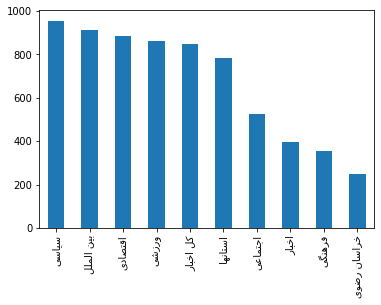

In [ ]:
df['category'].apply(lambda x: get_display(arabic_reshaper.reshape(x))).value_counts()[0:10].plot(kind='bar') #the arabic reshaping on the column is to show the persian names correclty

**Part 2 -- Plotting count of news articles by date**

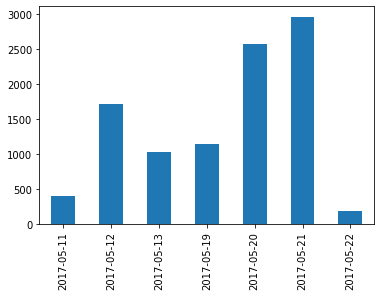

In [ ]:
df['date_created'].value_counts().sort_index(ascending=True).plot(kind='bar') #the sort_index(ascending=True) makes sure to sort by name (which in our case, in order of date increasing)

**Part 3 -- Plotting count of news articles by date**

In [ ]:
def domain_name(url):
    return url.split("www.")[-1].split("//")[-1].split(".")[0]

In [ ]:
df['agency_name'] = df['url'].apply(lambda x: domain_name(x))

In [ ]:
print(df['agency_name'].unique())
print(f"\n\n number of unique domain names: {df['agency_name'].nunique()}")

['khabaronline' 'farsnews' 'irna' 'qudsonline' 'qumpress' 'mizanonline'
 'asre-eghtesad' 'iribnews' 'mehrnews' 'markazi' 'isna' 'lorestan' 'qom'
 'ilna' 'asriran' 'iqna' 'tabnakmazani' 'tasnimnews' 'farhangnews' 'yjc'
 'bultannews' 'news' 'sobheqazvin' 'tabasomnews' 'snn' 'zanjan' 'gilan'
 'qomnews' 'hamshahrionline' 'tabriz' 'javanonline' 'parsine' 'fa'
 'esfahanshargh' 'tabnak' 'khorasannews' 'hidoctor' 'donya-e-eqtesad'
 'boeinmiandasht' 'jamnews' 'isaar' 'borujerdema' 'bartarinha'
 'khabarnema' 'ilamnews' 'bornanews' 'khalijefars' 'tabnakalborz'
 'tabnak4mahal' 'tabnakkermanshah' 'golestan' 'tabnakjazireh' 'qomna'
 'ibna' 'sabalaneh' 'shana' 'rajanews' 'tabnakazargharbi' 'tabnakzanjan'
 'tabnakyazd' 'tabnakrazavi' 'tabnakhamadan' 'tabasnews' 'abnews'
 'shahrekord' 'khorasan' 'isfahan' 'tabnaksemnan' 'eghtesadonline'
 'aftabnews' 'kurdistan' 'nakhostnews' 'jamejamonline' 'tabnakkohkiluye'
 'alborz' 'qazvin' 'tabnakbushehr' 'tabnakgilan' 'sahebnews' 'shara'
 'ardabil' 'vatanemrooz' '

In [ ]:
df_agency = df['agency_name'].value_counts().to_frame(name='count').reset_index().sort_values('index').reset_index(drop=True)
df_agency

,index,count
0,abnews,3
1,aftabnews,35
2,akharinkhabar,578
3,albf,1
4,alborz,5
...,...,...
158,vatanemrooz,46
159,yasouj,3
160,yazd,11
161,yjc,993


In [ ]:
x = np.arange(1, df_agency.shape[0]+1)
y = df_agency['count'].to_numpy()

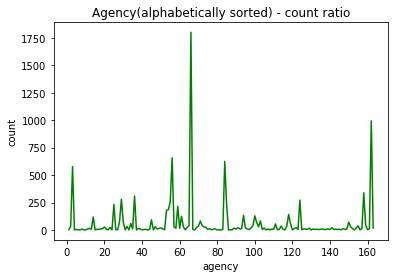

In [ ]:
plt.title("Agency(alphabetically sorted) - count ratio")
plt.xlabel("agency")
plt.ylabel("count")
plt.plot(x, y, color ="green")
plt.show()